In [1]:
# author Alex J. Yang
import numpy as np
import pandas as pd
import itertools

In [2]:
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
df = pd.read_csv(r'Allpaper.csv.zip')

In [4]:
dfNobel = pd.read_csv(r'712 Nobelpapers.zip')

In [5]:
df['NobelField'] = df['PaperID'].map(dfNobel.set_index('paperid')['Field'])

In [6]:
df['NobelField'].fillna(0 ,inplace=True)

In [7]:
df[df['NobelField']!=0]

,PaperID,Year,JournalID,SB_B,SB_T,type_Immediacy,type_Concave,Citation_Count,C10,Reference_Count,...,Patent_Count,Newsfeed_Count,Tweet_Count,FieldID,Fieldname,Hit_1pct,Hit_5pct,Hit_10pct,C_f,NobelField
7,2051995369,1917.0,1.834982e+08,8718.050093,86.0,0,0,3193.0,2.0,0.0,...,1,0,0,185592680.0,Chemistry,1.0,1.0,1.0,216.243072,Chemistry
11,1986113254,1918.0,1.111554e+08,7938.682133,85.0,0,0,14518.0,25.0,0.0,...,17,0,2,185592680.0,Chemistry,1.0,1.0,1.0,927.658556,Chemistry
81,1986715836,1913.0,3.006184e+09,2667.829638,94.0,0,0,665.0,21.0,0.0,...,0,0,130,185592680.0,Chemistry,1.0,1.0,1.0,92.283993,Physics
87,2313216101,1914.0,1.111554e+08,2596.503316,99.0,0,0,503.0,5.0,0.0,...,8,0,0,185592680.0,Chemistry,1.0,1.0,1.0,70.064216,Physics
128,2072443063,1928.0,1.377736e+08,2249.956985,74.0,0,0,1284.0,7.0,0.0,...,11,0,21,121332964.0,Physics,1.0,1.0,1.0,70.775170,Physics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2405957,2006788765,1978.0,1.377736e+08,-5.458184,7.0,0,1,2857.0,390.0,15.0,...,6,0,0,86803240.0,Biology,1.0,1.0,1.0,108.039085,Medicine
2406194,1786523947,1959.0,4.442502e+07,-6.514750,5.0,0,1,1903.0,425.0,18.0,...,1375,0,0,185592680.0,Chemistry,1.0,1.0,1.0,104.486156,Medicine
2406268,1991602497,1995.0,3.880285e+06,-7.195670,5.0,0,1,4241.0,1414.0,28.0,...,6,1,10,121332964.0,Physics,1.0,1.0,1.0,214.836066,Physics
2406345,2008574207,1971.0,1.377736e+08,-9.485763,6.0,0,1,7133.0,1586.0,25.0,...,85,0,10,185592680.0,Chemistry,1.0,1.0,1.0,443.126087,Medicine


In [10]:
df[df['NobelField']=='Medicine']

,PaperID,Year,JournalID,SB_B,SB_T,type_Immediacy,type_Concave,Citation_Count,C10,Reference_Count,...,Patent_Count,Newsfeed_Count,Tweet_Count,FieldID,Fieldname,Hit_1pct,Hit_5pct,Hit_10pct,C_f,NobelField
393,2029111077,1937.0,44783556.0,1327.266370,71.0,0,0,357.0,13.0,22.0,...,0,0,0,15744967.0,Psychology,1.0,1.0,1.0,31.589963,Medicine
909,2048075051,1924.0,171911960.0,895.183155,59.0,0,0,786.0,67.0,6.0,...,7,0,0,86803240.0,Biology,1.0,1.0,1.0,88.713623,Medicine
1008,2079512683,1913.0,2090548.0,855.562662,80.0,0,0,679.0,6.0,0.0,...,0,0,0,71924100.0,Medicine,1.0,1.0,1.0,183.246801,Medicine
2293,1999595872,1935.0,11051793.0,561.215610,74.0,0,0,1024.0,43.0,19.0,...,0,0,0,15744967.0,Psychology,1.0,1.0,1.0,89.786456,Medicine
2571,2153824299,1962.0,86558740.0,527.108638,45.0,0,0,772.0,21.0,7.0,...,10,1,0,86803240.0,Biology,1.0,1.0,1.0,37.250334,Medicine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2404771,1985774274,1974.0,137773608.0,-3.969529,3.0,0,1,1678.0,386.0,12.0,...,42,0,4,86803240.0,Biology,1.0,1.0,1.0,67.755894,Medicine
2405389,2137590150,1996.0,110447773.0,-4.484533,4.0,0,1,3064.0,1028.0,53.0,...,136,0,2,86803240.0,Biology,1.0,1.0,1.0,67.861381,Medicine
2405957,2006788765,1978.0,137773608.0,-5.458184,7.0,0,1,2857.0,390.0,15.0,...,6,0,0,86803240.0,Biology,1.0,1.0,1.0,108.039085,Medicine
2406194,1786523947,1959.0,44425019.0,-6.514750,5.0,0,1,1903.0,425.0,18.0,...,1375,0,0,185592680.0,Chemistry,1.0,1.0,1.0,104.486156,Medicine


In [8]:
# calculate CI using bootstrap
def calculateCI(data,method,n):
    m=int(len(data)/10) #take 10% data
    ms=[]
    for j in range(n): #number of samples
        if method=='mean':
                ms.append(np.mean(np.random.choice(data,m)))
        if method=='median':
                ms.append(np.median(np.random.choice(data,m)))
    a,b=[np.percentile(ms,2.5),np.percentile(ms,97.5)]
    return a,b

In [9]:
def yearGroup(x):
    if x<1920:
        return '1900-1919'
    elif x<1940:
        return '1920-1939'
    elif x<1960:
        return '1940-1959'
    elif x<1980:
        return '1960-1979'
    else:
        return '1980-1999'
    
def delayGroup(x):
    if x<2:
        return x
    elif x<10:
        return '2-9'
    elif x<20:
        return '10-19'
    elif x<50:
        return '20-49'
    else:
        return '>50'
df['yearGroup'] = df['Year'].apply(yearGroup)
df['delayGroup'] = df['SB_T'].apply(delayGroup)

In [10]:
df1= df[(df['type_Concave'] == 0)&(df['type_Immediacy'] == 0)].copy()
df2 = df[df['type_Concave'] == 1].copy()
df3 = df[df['type_Immediacy'] == 1].copy()

In [11]:
def convert_column_to_percentile(df, column_name):
    ranks = df[column_name].rank()
    percentiles = (ranks - 1) / (len(df) - 1) * 100
    df[column_name + '_percentile'] = percentiles
convert_column_to_percentile(df1, 'SB_B')

In [12]:
def BpGroup(x):
    if x<5:
        return 5
    elif x<50:
        return 50
    elif x<95:
        return 95
    else:
        return 100
df1['SB_B_p'] = df1['SB_B_percentile'].apply(BpGroup)

In [13]:
df.columns

Index(['PaperID', 'Year', 'JournalID', 'SB_B', 'SB_T', 'type_Immediacy',
       'type_Concave', 'Citation_Count', 'C10', 'Reference_Count', 'C5',
       'Team_Size', 'Institution_Count', 'Disruption', 'Atyp_10pct_Z',
       'Atyp_Median_Z', 'Patent_Count', 'Newsfeed_Count', 'Tweet_Count',
       'FieldID', 'Fieldname', 'Hit_1pct', 'Hit_5pct', 'Hit_10pct', 'C_f',
       'NobelField', 'yearGroup', 'delayGroup'],
      dtype='object')

In [14]:
dflst = [df , df1 , df2 , df3]

# Hit papers

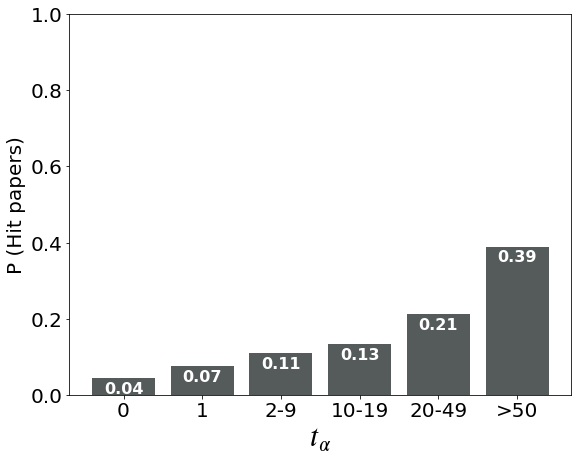

In [15]:
x = range(6)
typelst = [0,1,'2-9', '10-19', '20-49','>50']
colum = 'Hit_1pct'
y = np.array([len(df.loc[(df['delayGroup']==x)&(df[colum]!=0) , colum])/len(df[df['delayGroup']==x]) for x in typelst])

f, ax = plt.subplots(figsize=(9, 7))
plt.bar(x , y , capsize = 15 ,color='#424949', alpha = .9)
plt.yticks(fontsize=20,)
plt.xticks(x,typelst,fontsize=20,)
plt.ylim(0,1)
plt.ylabel('P (Hit papers)',fontsize = 20)
plt.xlabel(r'$𝑡_𝛼$',fontsize = 30)
for _ in range(len(y)):
    plt.text(x[_], y[_]-0.04 , str(y[_].round(2)),fontsize = 16,c = 'white', ha='center', fontweight='bold')

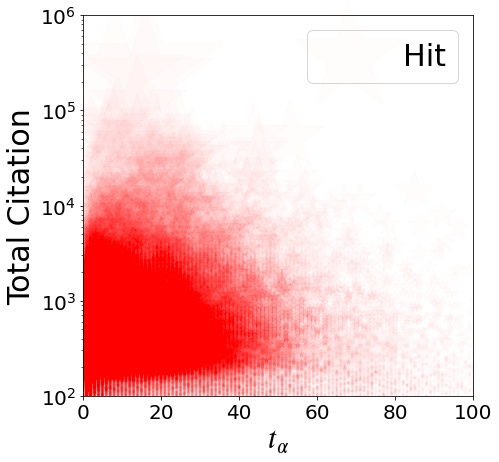

In [16]:
dff1 = df[df['Hit_1pct']==1]
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(dff1['SB_T'], dff1['Citation_Count'], c = 'red',marker='*',s=dff1['Citation_Count']*0.1, alpha = 0.01,label='Hit')
plt.ylim(100,1000000)
ax.set_yscale("log")
plt.xlim(0,100)
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.ylabel('Total Citation',fontsize = 30)
plt.xlabel(r'$𝑡_𝛼$',fontsize = 30)
plt.legend(fontsize = 30)
plt.show()

In [17]:
x = range(6)
typelst = ['convex','immediacy','0-5','5-50','50-95','95-100']
CClst = [5,50,95,100]
colum = 'Hit_1pct'
y1 = np.array([ len(df1.loc[(df1['SB_B_p']==x)&(df1[colum]!=0) , colum])/len(df1[df1['SB_B_p']==x]) for x in CClst])

y2 =  np.array(len(df2.loc[df2[colum]!=0 , colum])/len(df2))
y3 =  np.array(len(df3.loc[df3[colum]!=0 , colum])/len(df3))

y =  np.append(np.array([y2,y3]),y1)

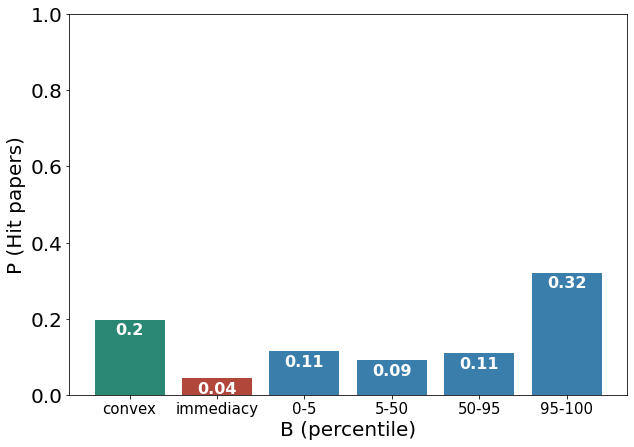

In [18]:
f, ax = plt.subplots(figsize=(10, 7))
plt.bar(x , y , capsize = 15 ,color=['#117A65','#A93226']+['#2471A3']*4, alpha = .9)
plt.yticks(fontsize=20,)
plt.xticks(x,typelst,fontsize=15,)
plt.ylim(0,1)
plt.ylabel('P (Hit papers)',fontsize = 20)
plt.xlabel('B (percentile)',fontsize = 20)
for _ in range(len(y)):
    plt.text(x[_], y[_]-0.04 , str(y[_].round(2)),fontsize = 16,c = 'white', ha='center', fontweight='bold')

In [19]:
dff1 = df1[df1['Hit_1pct']==1]

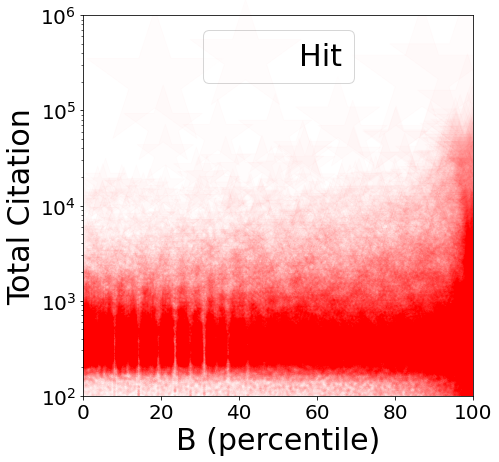

In [20]:
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(dff1['SB_B_percentile'], dff1['Citation_Count'], c = 'red',marker='*',s=dff1['Citation_Count']*0.1, alpha = 0.01,label='Hit')
plt.ylim(100,1000000)
ax.set_yscale("log")
plt.xlim(0,100)
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.legend(fontsize = 30)
plt.ylabel('Total Citation',fontsize = 30)
plt.xlabel('B (percentile)',fontsize = 30)
plt.show()

# Nobel papers

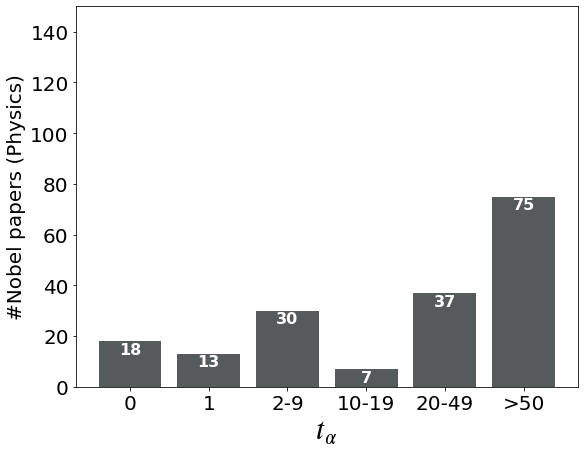

In [43]:
x = range(6)
typelst = [0,1,'2-9', '10-19', '20-49','>50']
colum = 'NobelField'
y = np.array([len(df.loc[(df['delayGroup']==x)&(df[colum]=='Physics') , colum]) for x in typelst])

f, ax = plt.subplots(figsize=(9, 7))
plt.bar(x , y , capsize = 15 ,color='#424949', alpha = .9)
plt.yticks(fontsize=20,)
plt.xticks(x,typelst,fontsize=20,)
plt.ylim(0,150)
plt.ylabel('#Nobel papers (Physics)',fontsize = 20)
plt.xlabel(r'$𝑡_𝛼$',fontsize = 30)
for _ in range(len(y)):
    plt.text(x[_], y[_]-5 , str(int(float(y[_]))),fontsize = 16,c = 'white', ha='center', fontweight='bold')

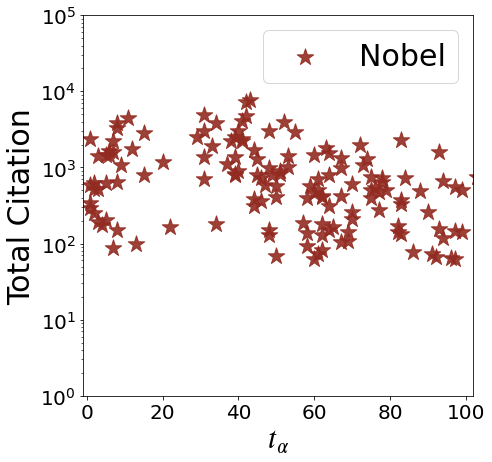

In [22]:
dff1 = df1[df1[colum]=='Physics']
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(dff1['SB_T'], dff1['Citation_Count'], c = '#922B21',marker='*',s=300, alpha = 0.9,label='Nobel')
plt.ylim(1,100000)
ax.set_yscale("log")
plt.xlim(-1,102)
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.ylabel('Total Citation',fontsize = 30)
plt.xlabel(r'$𝑡_𝛼$',fontsize = 30)
plt.legend(fontsize = 30)
plt.show()

In [44]:
x = range(6)
typelst = ['convex','immediacy','0-5','5-50','50-95','95-100']
CClst = [5,50,95,100]
colum = 'NobelField'
y1 = np.array([ len(df1.loc[(df1['SB_B_p']==x)&(df1[colum]=='Physics') , colum]) for x in CClst])

y2 =  np.array(len(df2.loc[df2[colum]=='Physics' , colum]))
y3 =  np.array(len(df3.loc[df3[colum]=='Physics' , colum]))

y =  np.append(np.array([y2,y3]),y1)

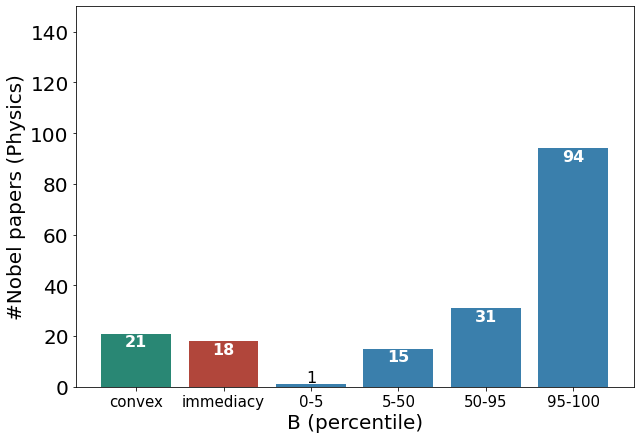

In [45]:
f, ax = plt.subplots(figsize=(10, 7))
plt.bar(x , y , capsize = 15 ,color=['#117A65','#A93226']+['#2471A3']*4, alpha = .9)
plt.yticks(fontsize=20,)
plt.xticks(x,typelst,fontsize=15,)
plt.ylim(0,150)
plt.ylabel('#Nobel papers (Physics)',fontsize = 20)
plt.xlabel('B (percentile)',fontsize = 20)
for _ in range(len(y)):
    if y[_]>10:
        plt.text(x[_], y[_]-5 , str(y[_].round(3)),fontsize = 16,c = 'white', ha='center', fontweight='bold')
    else:
        plt.text(x[_], y[_]+1 , str(y[_].round(3)),fontsize = 16,c = 'black', ha='center')

In [25]:
dff1 = df1[df1[colum]=='Physics']

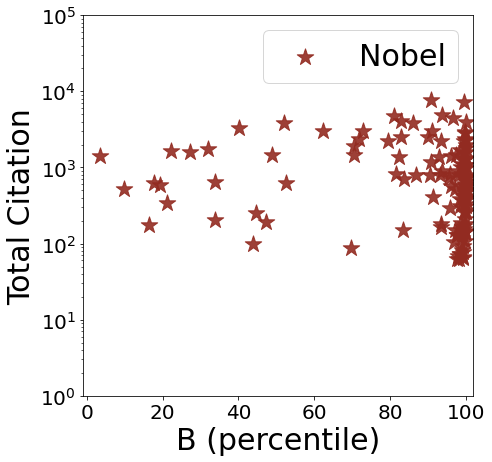

In [26]:
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(dff1['SB_B_percentile'], dff1['Citation_Count'], c = '#922B21',marker='*',s=300, alpha = 0.9,label='Nobel')
plt.ylim(1,100000)
ax.set_yscale("log")
plt.xlim(-1,102)
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.ylabel('Total Citation',fontsize = 30)
plt.xlabel('B (percentile)',fontsize = 30)
plt.legend(fontsize = 30)
plt.show()

# Chemistry

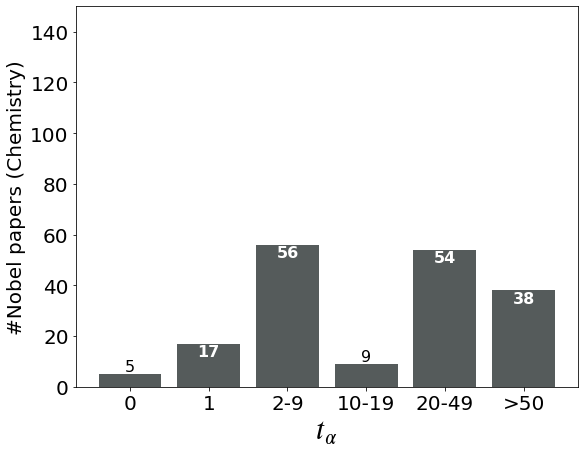

In [41]:
x = range(6)
typelst = [0,1,'2-9', '10-19', '20-49','>50']
colum = 'NobelField'
y = np.array([len(df.loc[(df['delayGroup']==x)&(df[colum]=='Chemistry') , colum]) for x in typelst])

f, ax = plt.subplots(figsize=(9, 7))
plt.bar(x , y , capsize = 15 ,color='#424949', alpha = .9)
plt.yticks(fontsize=20,)
plt.xticks(x,typelst,fontsize=20,)
plt.ylim(0,150)
plt.ylabel('#Nobel papers (Chemistry)',fontsize = 20)
plt.xlabel(r'$𝑡_𝛼$',fontsize = 30)
for _ in range(len(y)):
    if y[_]>10:
        plt.text(x[_], y[_]-5 , str(y[_].round(3)),fontsize = 16,c = 'white', ha='center', fontweight='bold')
    else:
        plt.text(x[_], y[_]+1 , str(y[_].round(3)),fontsize = 16,c = 'black', ha='center')

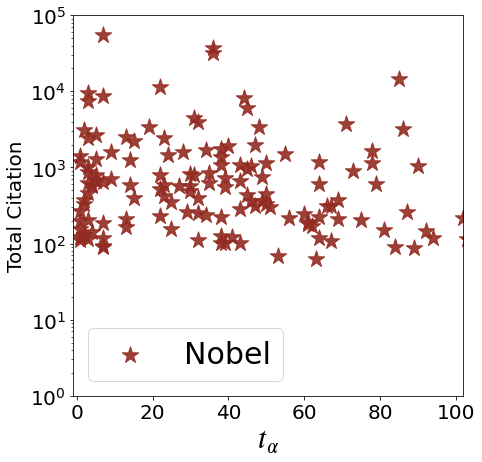

In [40]:
dff1 = df1[df1[colum]=='Chemistry']
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(dff1['SB_T'], dff1['Citation_Count'], c = '#922B21',marker='*',s=300, alpha = 0.9,label='Nobel')
plt.ylim(1,100000)
ax.set_yscale("log")
plt.xlim(-1,102)
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.ylabel('Total Citation',fontsize = 20)
plt.xlabel(r'$𝑡_𝛼$',fontsize = 30)
plt.legend(fontsize = 30)
plt.show()

In [29]:
x = range(6)
typelst = ['convex','immediacy','0-5','5-50','50-95','95-100']
CClst = [5,50,95,100]
colum = 'NobelField'
y1 = np.array([ len(df1.loc[(df1['SB_B_p']==x)&(df1[colum]=='Chemistry') , colum]) for x in CClst])

y2 =  np.array(len(df2.loc[df2[colum]=='Chemistry' , colum]))
y3 =  np.array(len(df3.loc[df3[colum]=='Chemistry' , colum]))

y =  np.append(np.array([y2,y3]),y1)

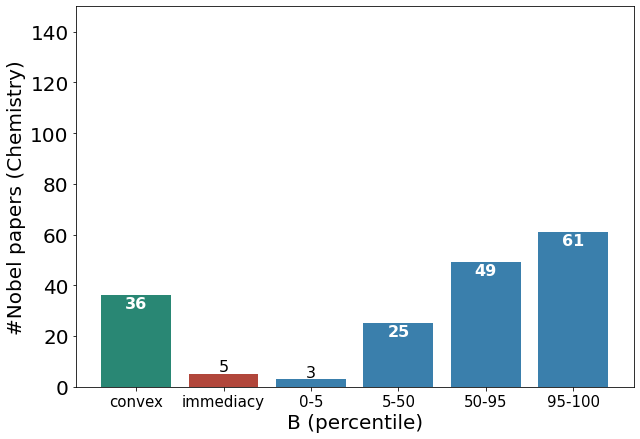

In [30]:
f, ax = plt.subplots(figsize=(10, 7))
plt.bar(x , y , capsize = 15 ,color=['#117A65','#A93226']+['#2471A3']*4, alpha = .9)
plt.yticks(fontsize=20,)
plt.xticks(x,typelst,fontsize=15,)
plt.ylim(0,150)
plt.ylabel('#Nobel papers (Chemistry)',fontsize = 20)
plt.xlabel('B (percentile)',fontsize = 20)
for _ in range(len(y)):
    if y[_]>10:
        plt.text(x[_], y[_]-5 , str(y[_].round(3)),fontsize = 16,c = 'white', ha='center', fontweight='bold')
    else:
        plt.text(x[_], y[_]+1 , str(y[_].round(3)),fontsize = 16,c = 'black', ha='center')

In [31]:
dff1 = df1[df1[colum]=='Chemistry']

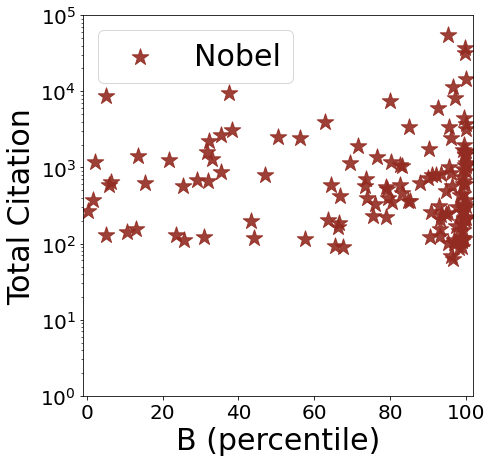

In [32]:
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(dff1['SB_B_percentile'], dff1['Citation_Count'], c = '#922B21',marker='*',s=300, alpha = 0.9,label='Nobel')
plt.ylim(1,100000)
ax.set_yscale("log")
plt.xlim(-1,102)
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.ylabel('Total Citation',fontsize = 30)
plt.xlabel('B (percentile)',fontsize = 30)
plt.legend(fontsize = 30)
plt.show()

# Medicine

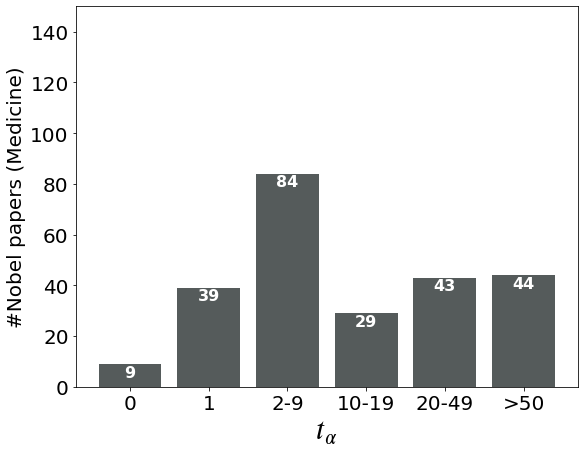

In [46]:
x = range(6)
typelst = [0,1,'2-9', '10-19', '20-49','>50']
colum = 'NobelField'
y = np.array([len(df.loc[(df['delayGroup']==x)&(df[colum]=='Medicine') , colum]) for x in typelst])

f, ax = plt.subplots(figsize=(9, 7))
plt.bar(x , y , capsize = 15 ,color='#424949', alpha = .9)
plt.yticks(fontsize=20,)
plt.xticks(x,typelst,fontsize=20,)
plt.ylim(0,150)
plt.ylabel('#Nobel papers (Medicine)',fontsize = 20)
plt.xlabel(r'$𝑡_𝛼$',fontsize = 30)
for _ in range(len(y)):
    plt.text(x[_], y[_]-5 , str(int(float(y[_]))),fontsize = 16,c = 'white', ha='center', fontweight='bold')

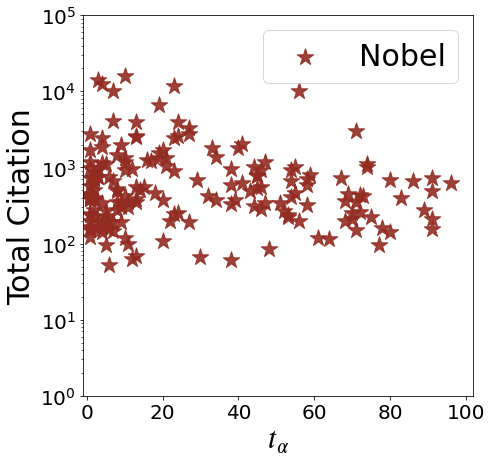

In [34]:
dff1 = df1[df1[colum]=='Medicine']
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(dff1['SB_T'], dff1['Citation_Count'], c = '#922B21',marker='*',s=300, alpha = 0.9,label='Nobel')
plt.ylim(1,100000)
ax.set_yscale("log")
plt.xlim(-1,102)
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.ylabel('Total Citation',fontsize = 30)
plt.xlabel(r'$𝑡_𝛼$',fontsize = 30)
plt.legend(fontsize = 30)
plt.show()

In [35]:
x = range(6)
typelst = ['convex','immediacy','0-5','5-50','50-95','95-100']
CClst = [5,50,95,100]
colum = 'NobelField'
y1 = np.array([ len(df1.loc[(df1['SB_B_p']==x)&(df1[colum]=='Medicine') , colum]) for x in CClst])

y2 =  np.array(len(df2.loc[df2[colum]=='Medicine' , colum]))
y3 =  np.array(len(df3.loc[df3[colum]=='Medicine' , colum]))

y =  np.append(np.array([y2,y3]),y1)

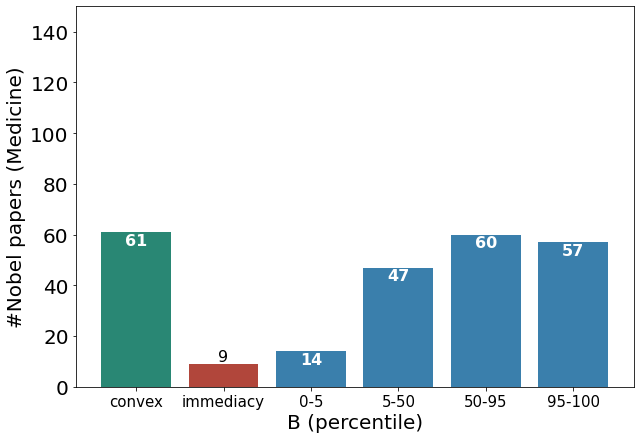

In [36]:
f, ax = plt.subplots(figsize=(10, 7))
plt.bar(x , y , capsize = 15 ,color=['#117A65','#A93226']+['#2471A3']*4, alpha = .9)
plt.yticks(fontsize=20,)
plt.xticks(x,typelst,fontsize=15,)
plt.ylim(0,150)
plt.ylabel('#Nobel papers (Medicine)',fontsize = 20)
plt.xlabel('B (percentile)',fontsize = 20)
for _ in range(len(y)):
    if y[_]>10:
        plt.text(x[_], y[_]-5 , str(y[_].round(3)),fontsize = 16,c = 'white', ha='center', fontweight='bold')
    else:
        plt.text(x[_], y[_]+1 , str(y[_].round(3)),fontsize = 16,c = 'black', ha='center')

In [37]:
dff1 = df1[df1[colum]=='Medicine']

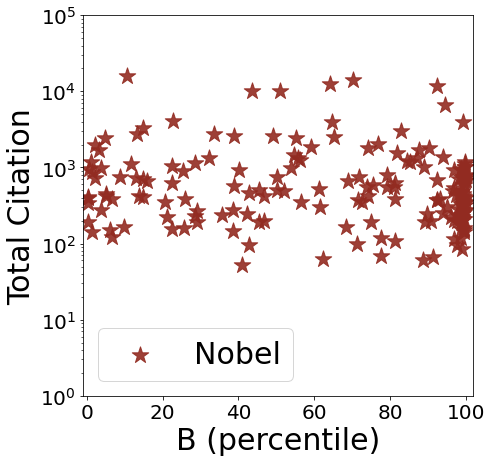

In [38]:
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(dff1['SB_B_percentile'], dff1['Citation_Count'], c = '#922B21',marker='*',s=300, alpha = 0.9,label='Nobel')
plt.ylim(1,100000)
ax.set_yscale("log")
plt.xlim(-1,102)
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.ylabel('Total Citation',fontsize = 30)
plt.xlabel('B (percentile)',fontsize = 30)
plt.legend(fontsize = 30)
plt.show()